<a href="https://colab.research.google.com/github/Ritu-95/python_code/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns  #Understanding my variables

In [2]:
# importing the files
from google.colab  import files
files.upload()

Saving application_data.csv to application_data.csv


In [4]:
#reading the first 5 records 
df = pd.read_csv("application_data.csv")
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


1. Check data shape (num of Rows & Columns)





In [5]:
df.shape

(307511, 122)

2. Check each data type of columns and missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


3. Only keeping the required column which the indicate if a client has difficulty paying their
installments which may be used for taking actions such as denying the loan, reducing the
amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that
the consumers capable of repaying the loan are not rejected. Identification of such applicants
using EDA is the aim of this case study.

In [27]:
new_df = df[['TARGET','NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_EDUCATION_TYPE','OCCUPATION_TYPE']]
new_df.head(5)


,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE
0,1,Cash loans,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Secondary / secondary special,Laborers
1,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Higher education,Core staff
2,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Secondary / secondary special,Laborers
3,0,Cash loans,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Secondary / secondary special,Laborers
4,0,Cash loans,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Secondary / secondary special,Core staff


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307511 non-null  int64  
 1   NAME_CONTRACT_TYPE   307511 non-null  object 
 2   AMT_INCOME_TOTAL     307511 non-null  float64
 3   AMT_CREDIT           307511 non-null  float64
 4   AMT_ANNUITY          307499 non-null  float64
 5   AMT_GOODS_PRICE      307233 non-null  float64
 6   NAME_INCOME_TYPE     307511 non-null  object 
 7   NAME_EDUCATION_TYPE  307511 non-null  object 
 8   NAME_EDUCATION_TYPE  307511 non-null  object 
 9   OCCUPATION_TYPE      211120 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 23.5+ MB


4. Summary Statistics

In [29]:
new_df = new_df.dropna(axis=0)
new_df.shape

(210887, 10)

4. Analyzing relationships between variables


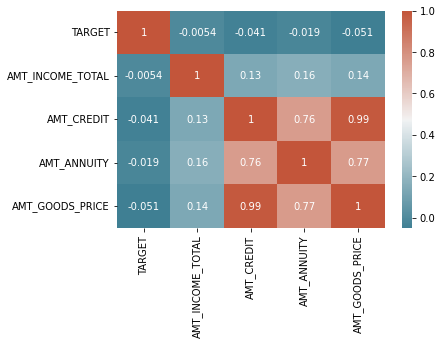

In [30]:
# calculate correlation matrix
corr = new_df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

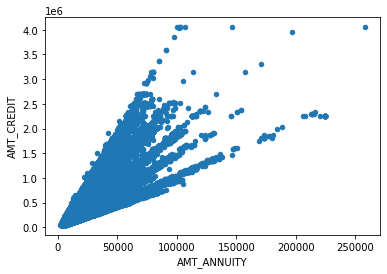

In [34]:
new_df.plot(kind='scatter', x='AMT_ANNUITY', y='AMT_CREDIT')

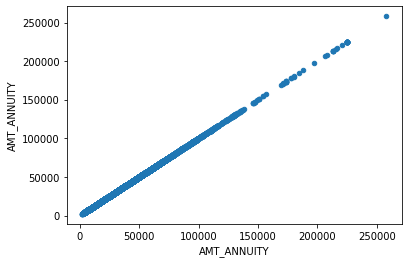

In [39]:
new_df.plot(kind='scatter', x= 'AMT_ANNUITY', y='AMT_ANNUITY')

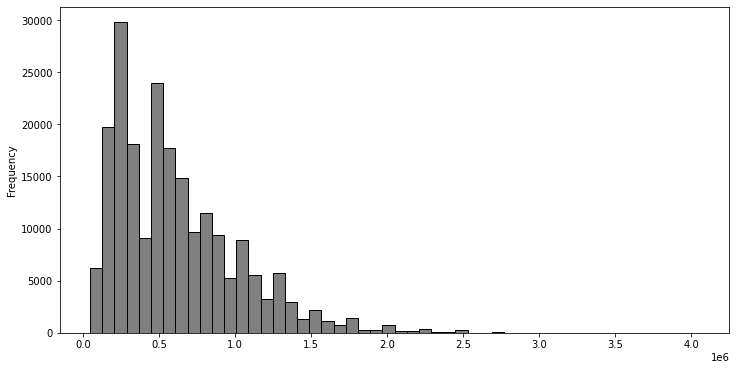

In [44]:
new_df['AMT_CREDIT'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

#df_cleaned['odometer'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')df_cleaned['year'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

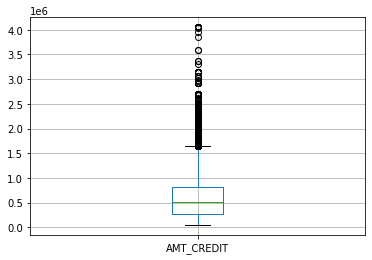

In [45]:
new_df.boxplot('AMT_CREDIT')

The image below explains how to read a boxplot. Immediately, you can see that there are a number of outliers for price in the upper range and that most of the Amount _credit fall between 0 and 1.5.